In [1]:
import os
import sys
import numpy as np
import stopit
import time
import matplotlib.pyplot as plt

In [2]:
# importing neurokit2 as a submodule so that it's always the same version
repo_name = "fixpeaks_with_large_gaps"
submodule_parent_dir = "lib"
submodule_name = "NeuroKitMod"

repo_path = os.getcwd()
base_dir = os.path.basename(repo_path)
while base_dir != repo_name:
    repo_path = os.path.dirname(os.path.abspath(repo_path))
    base_dir = os.path.basename(repo_path)
    
submodule_path = os.path.join(repo_path, submodule_parent_dir, submodule_name)
sys.path.insert(0, submodule_path)

In [3]:
import neurokit2 as nk

In [16]:
signal = nk.signal_simulate(duration=20, sampling_rate=1000, frequency=1)
peaks_true = nk.signal_findpeaks(signal)["Peaks"]
peaks = np.delete(peaks_true, [5,6,7,8,9,10,15,16,17,18,])  # create gaps 
# (I added more than in the example in the function docstring)
peaks = np.sort(np.append(peaks, [1350, 11350]))  # add artifacts

In [17]:
peaks

array([  250,  1250,  1350,  2250,  3250,  4250, 11250, 11350, 12250,
       13250, 14250, 19250], dtype=int64)

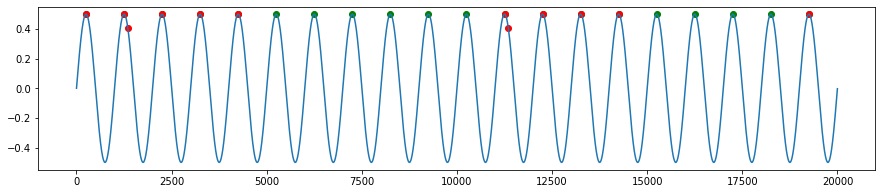

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
plt.plot(signal)    
plt.scatter(peaks_true, signal[peaks_true], color="green")
plt.scatter(peaks, signal[peaks], color="red")

plt.show()

In [19]:
interval_maxes = [None, 1.5, 2.0]
max_seconds = 10
for interval_max in interval_maxes:
    print("Interval max: " + str(interval_max))
    with stopit.ThreadingTimeout(max_seconds) as context_manager:

        t0 = time.time()
        peaks_corrected = nk.signal_fixpeaks(peaks=peaks, interval_min=0.5, interval_max=interval_max, method="neurokit")
        t1 = time.time()

    if context_manager.state == context_manager.EXECUTED:
        total = t1-t0
        print("Took " + str(total) + " seconds. EXECUTED")
        print("Peaks corrected: ")
        print(peaks_corrected)
    elif context_manager.state == context_manager.TIMED_OUT:
        print("Took more than " + str(max_seconds) + " seconds. TIMED_OUT")

Interval max: None
Took 0.0 seconds. EXECUTED
Peaks corrected: 
[  250  1250  2250  3250  4250 11250 12250 13250 14250 19250]
Interval max: 1.5
Took 0.006978034973144531 seconds. EXECUTED
Peaks corrected: 
[  250  1250  2250  3250  4250  5250  6250  7250  8250  9250 10250  9583
  7250  6028  5917  5805  5694]
Interval max: 2.0
Took 0.004983425140380859 seconds. EXECUTED
Peaks corrected: 
[  250  1250  2250  3250  4250  5250  6250  7250  8250  9250 10250  9583
  7250  6028  5917  5805  5694]


In [20]:
interval_maxes = [None, 1.5, 2.0]
max_seconds = 10
for interval_max in interval_maxes:
    print("Interval max: " + str(interval_max))
    with stopit.ThreadingTimeout(max_seconds) as context_manager:

        t0 = time.time()
        peaks_corrected = nk.signal_fixpeaks(peaks=peaks, interval_min=0.5, interval_max=interval_max, interpolate_on_peaks=True, method="neurokit")
        t1 = time.time()

    if context_manager.state == context_manager.EXECUTED:
        total = t1-t0
        print("Took " + str(total) + " seconds. EXECUTED")
        print("Peaks corrected: ")
        print(peaks_corrected)
    elif context_manager.state == context_manager.TIMED_OUT:
        print("Took more than " + str(max_seconds) + " seconds. TIMED_OUT")

Interval max: None
Took 0.0 seconds. EXECUTED
Peaks corrected: 
[  250  1250  2250  3250  4250 11250 12250 13250 14250 19250]
Interval max: 1.5
Took 0.0029921531677246094 seconds. EXECUTED
Peaks corrected: 
[  250  1250  2250  3250  4250  5535  6821  8107  9392 10678 11964 13250
 14250 14250 14250]
Interval max: 2.0
Took 0.0029914379119873047 seconds. EXECUTED
Peaks corrected: 
[  250  1250  2250  3250  4250  5535  6821  8107  9392 10678 11964 13250
 14250 14250 14250]
